### NYC Parking Tickets: An Exploratory Analysis

### Team - VIVEK AND SHAILESH

### Objectives of the Case Study

* Primarily, this case study is meant as a deep dive into the usage of Spark. As you saw while working with Spark, its syntax behaves differently from a regular Python syntax. One of the major objectives of this case study is to gain familiarity with how analysis works in PySpark as opposed to base Python.
* Learning the basic idea behind using functions in PySpark can help in using other libraries like SparkR. If you are in a company where R is a primary language, you can easily pick up SparkR syntax and use Spark’s processing power.
* The process of running a model-building command boils down to a few lines of code. While drawing inferences from data, the most time-consuming step is preparing the data up to the point of model building. So, this case study will focus more on exploratory analysis.

### Problem Statement
Big data analytics allows you to analyse data at scale. It has applications in almost every industry in the world. Let’s consider an unconventional application that you wouldn’t ordinarily encounter.

New York City is a thriving metropolis. Just like most other metros its size, one of the biggest problems its citizens face is parking. The classic combination of a huge number of cars and cramped geography leads to a huge number of parking tickets.

In an attempt to scientifically analyse this phenomenon, the NYC Police Department has collected data for parking tickets. Of these, the data files for multiple years are publicly available on Kaggle. We will try and perform some exploratory analysis on a part of this data. Spark will allow us to analyse the full files at high speeds as opposed to taking a series of random samples that will approximate the population. For the scope of this analysis, we will analyse the parking tickets over the year 2017.

Note: Although the broad goal of any analysis of this type is to have better parking and fewer tickets, we are not looking for recommendations on how to reduce the number of parking tickets—there are no specific points reserved for this.

The purpose of this case study is to conduct an exploratory data analysis that will help you understand the data. Since the size of the dataset is large, your queries will take some time to run, and you will need to identify the correct queries quicker. The questions given below will guide your analysis.

In [2]:
#Importing Pyspark
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("NYC Parking Exploratory Analysis") \
    .getOrCreate()

In [3]:
#Reading CSV data 
nyc_parking = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load('/common_folder/nyc_parking/Parking_Violations_Issued_-_Fiscal_Year_2017.csv')
nyc_parking

DataFrame[Summons Number: bigint, Plate ID: string, Registration State: string, Issue Date: timestamp, Violation Code: int, Vehicle Body Type: string, Vehicle Make: string, Violation Precinct: int, Issuer Precinct: int, Violation Time: string]

In [4]:
nyc_parking.show(5)

+--------------+--------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons Number|Plate ID|Registration State|         Issue Date|Violation Code|Vehicle Body Type|Vehicle Make|Violation Precinct|Issuer Precinct|Violation Time|
+--------------+--------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+--------------+
|    5092469481| GZH7067|                NY|2016-07-10 00:00:00|             7|             SUBN|       TOYOT|                 0|              0|         0143A|
|    5092451658| GZH7067|                NY|2016-07-08 00:00:00|             7|             SUBN|       TOYOT|                 0|              0|         0400P|
|    4006265037| FZX9232|                NY|2016-08-23 00:00:00|             5|             SUBN|        FORD|                 0|              0|         0233P|
|    8478629828| 66623ME|         

In [5]:
# Fetching Column details
nyc_parking.printSchema()

root
 |-- Summons Number: long (nullable = true)
 |-- Plate ID: string (nullable = true)
 |-- Registration State: string (nullable = true)
 |-- Issue Date: timestamp (nullable = true)
 |-- Violation Code: integer (nullable = true)
 |-- Vehicle Body Type: string (nullable = true)
 |-- Vehicle Make: string (nullable = true)
 |-- Violation Precinct: integer (nullable = true)
 |-- Issuer Precinct: integer (nullable = true)
 |-- Violation Time: string (nullable = true)



In [6]:
# Total number of rows
nyc_parking.count()

10803028

In [7]:
# Describe
nyc_parking.describe().show()

+-------+--------------------+--------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+
|summary|      Summons Number|Plate ID|Registration State|    Violation Code| Vehicle Body Type|      Vehicle Make|Violation Precinct|  Issuer Precinct|   Violation Time|
+-------+--------------------+--------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+
|  count|            10803028|10803028|          10803028|          10803028|          10803028|          10803028|          10803028|         10803028|         10803028|
|   mean| 6.817447029065661E9|Infinity|              99.0|34.599430455979565|3.9258887134586864| 6519.974025974026| 45.01216260848347|46.82931211508477|909.2857142857143|
| stddev|2.3202339623282285E9|     NaN|               0.0|19.359868716323483|0.5013415469252523|18091.257389147086|40.552560268435805|62.66703577

In [8]:
# Number of columns
len(nyc_parking.columns)

10

In [9]:
# Checking duplicates
nyc_parking=nyc_parking.dropDuplicates()
nyc_parking.count()

10803028

There are no duplicates

In [10]:
# Null check
nyc_parking=nyc_parking.dropna()
nyc_parking.count()

10803028

In [11]:
#Checking distinct number of Summons Number column
nyc_parking.select('Summons Number').distinct().count()

10803028

In [12]:
#Replacing spaces with '_' for all column names
nyc_parking= nyc_parking.toDF(*(k.replace(' ', '_') for k in nyc_parking.columns))
nyc_parking.show(5)

+--------------+--------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons_Number|Plate_ID|Registration_State|         Issue_Date|Violation_Code|Vehicle_Body_Type|Vehicle_Make|Violation_Precinct|Issuer_Precinct|Violation_Time|
+--------------+--------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+--------------+
|    4635295722| CXC9014|                NY|2017-06-15 00:00:00|            36|             SUBN|       NISSA|                 0|              0|         0100P|
|    5095923518| HKM4336|                NY|2017-04-08 00:00:00|             7|             SUBN|       TOYOT|                 0|              0|         0100P|
|    5095901330| HKY8847|                NY|2017-04-06 00:00:00|             7|             SUBN|       DODGE|                 0|              0|         0100P|
|    5092838796| KBD3222|         

In [13]:
#Creating view
nyc_parking.createOrReplaceTempView("parkingtable")

In [14]:
spark.sql('Select * from parkingtable')

DataFrame[Summons_Number: bigint, Plate_ID: string, Registration_State: string, Issue_Date: timestamp, Violation_Code: int, Vehicle_Body_Type: string, Vehicle_Make: string, Violation_Precinct: int, Issuer_Precinct: int, Violation_Time: string]

In [18]:
# Total number of tickets per year
sql_ticket_per_year = spark.sql("select year(Issue_Date) as year, count(Summons_Number) as no_of_tickets from parkingtable group by year order by year")

In [17]:
sql_ticket_per_year.show(100)

+----+-------------+
|year|no_of_tickets|
+----+-------------+
|1972|            2|
|1973|            2|
|1974|            1|
|1976|            1|
|1977|            1|
|1984|            1|
|1985|            1|
|1990|            2|
|1991|            3|
|1994|            1|
|1996|            1|
|1997|            1|
|2000|          185|
|2001|            2|
|2002|            1|
|2003|            1|
|2004|            2|
|2005|            1|
|2006|            8|
|2007|           18|
|2008|            4|
|2009|            3|
|2010|           48|
|2011|           22|
|2012|           87|
|2013|           70|
|2014|          120|
|2015|          419|
|2016|      5368391|
|2017|      5431918|
|2018|         1057|
|2019|          472|
|2020|           22|
|2021|           22|
|2022|            4|
|2023|            5|
|2024|            3|
|2025|            6|
|2026|           24|
|2027|           50|
|2028|            8|
|2029|            2|
|2030|           12|
|2031|            5|
|2033|       

#### Inference
* There are data from 1972 to 2069
* Maximum data is around 2016-2017
* We will restrict our analysis to the year 2017.

In [19]:
sql_ticket_per_year.count()

55

There are 55 distinct years

In [20]:
# Filtering only 2017 data
nyc_parking.createOrReplaceTempView("table_view_2017")
nyc_parking=spark.sql("select * from table_view_2017 where year(TO_DATE(CAST(UNIX_TIMESTAMP(Issue_Date,'MM/dd/yyyy') AS TIMESTAMP))) = 2017 ")

In [21]:
# Count of year 2017 rows
nyc_parking.count()

5431918

In [22]:
# Creating temporary view to run SQL queries
nyc_parking.createOrReplaceTempView("table_view_2017")

#Showing month wise distribution 
Distribution_on_years= spark.sql("SELECT year(Issue_Date) as year,month(Issue_Date) as month,count(*) as Ticket_Frequency FROM table_view_2017 GROUP BY year(Issue_Date),month(Issue_Date) order by Ticket_Frequency desc")
Distribution_on_years.show()

+----+-----+----------------+
|year|month|Ticket_Frequency|
+----+-----+----------------+
|2017|    5|         1020244|
|2017|    3|          964737|
|2017|    4|          888402|
|2017|    1|          877365|
|2017|    6|          852187|
|2017|    2|          826967|
|2017|    7|             370|
|2017|    9|             367|
|2017|   12|             358|
|2017|   11|             338|
|2017|    8|             309|
|2017|   10|             274|
+----+-----+----------------+



#### May month has maximum number of violations. July to December, there is a significant drop in number of violations.

In [23]:
No_of_Violations_per_month = Distribution_on_years.toPandas()

<Figure size 432x288 with 0 Axes>

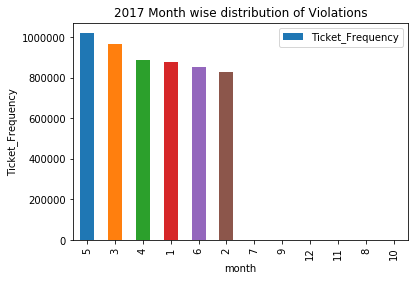

In [25]:
#Importing Pandas and Matplotlib
import pandas as pd
import matplotlib.pyplot as plt
plt.clf()
No_of_Violations_per_month.plot(x= 'month', y='Ticket_Frequency', kind='bar')
plt.title("2017 Month wise distribution of Violations")
plt.xlabel('month')
plt.ylabel('Ticket_Frequency')
plt.show()

In [26]:
#Null Check
Checking_nulls=spark.sql("Select count(*) as Number_of_Null_Values from table_view_2017 where Summons_Number is NULL or Plate_ID is NULL or Registration_State is NULL or Issue_Date is NULL or Violation_Code is NULL or Vehicle_Body_Type is NULL or Vehicle_Make is NULL or Violation_Precinct is NULL or Issuer_Precinct is NUll or Violation_Time is NULL ")
Checking_nulls.show()

+---------------------+
|Number_of_Null_Values|
+---------------------+
|                    0|
+---------------------+



##### There is no field with null value.

In [27]:
#Query to check if there are cases with same plate id.

Plate_Id_Check=spark.sql("Select Plate_ID, count(*) as Ticket_Frequency from table_view_2017 group by Plate_ID having count(*)>1 order by Ticket_Frequency desc")
Plate_Id_Check.show()

+----------+----------------+
|  Plate_ID|Ticket_Frequency|
+----------+----------------+
|BLANKPLATE|            5261|
|   96089MA|             529|
|   96087MA|             528|
|   94905JA|             527|
|   14828MJ|             526|
|   85848MD|             512|
|   30954JX|             510|
|   2121796|             507|
|   16242TC|             496|
|   2194153|             495|
|   77116MA|             493|
|   47603MD|             492|
|   12359MG|             474|
|   16208TC|             468|
|   49731MA|             464|
|   14829MJ|             460|
|    XEEF98|             458|
|   49331KA|             458|
|   2028685|             454|
|   66103JR|             452|
+----------+----------------+
only showing top 20 rows



####  Assumption : 'BLANKPLATE' value which cannot be tracked. Therefore, we can remove this.

In [28]:
# Removing BLANKPLATE plate id
nyc_parking=nyc_parking[nyc_parking.Plate_ID!='BLANKPLATE']
nyc_parking.count()

5426657

In [29]:
# Creating View after removing Blankplate
nyc_parking.createOrReplaceTempView("table_view_2017")

In [30]:
# Checking violations more than 500 per Plate_Id
Plate_Id_Above_500=spark.sql("Select Plate_ID, count(*) as Ticket_Frequency from table_view_2017 group by Plate_ID having count(*)>=500 order by Ticket_Frequency desc")
Plate_Id_Above_500.show()

+--------+----------------+
|Plate_ID|Ticket_Frequency|
+--------+----------------+
| 96089MA|             529|
| 96087MA|             528|
| 94905JA|             527|
| 14828MJ|             526|
| 85848MD|             512|
| 30954JX|             510|
| 2121796|             507|
+--------+----------------+



<Figure size 432x288 with 0 Axes>

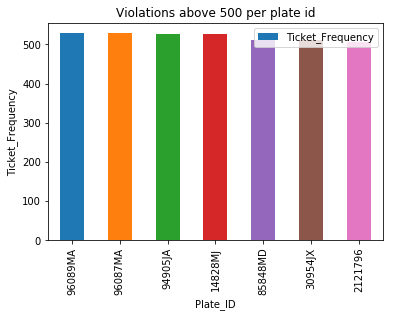

In [31]:
# Plot number of violation above 500
Number_of_Violations_By_PlateID=Plate_Id_Above_500.toPandas()
plt.clf()
Number_of_Violations_By_PlateID.plot(x= 'Plate_ID', y='Ticket_Frequency', kind='bar')
plt.title("Violations above 500 per plate id")
plt.xlabel('Plate_ID')
plt.ylabel('Ticket_Frequency')
plt.show()

#### There are 7 Plate ID with more than 500 violations.

## Questions to Be Answered in the Analysis

#### Examine the data

#### Q1. Find the total number of tickets for the year

In [32]:
question1=spark.sql("Select count(*) As Total_Rows,count(distinct(Summons_Number)) As Distinct_Summons_Number from table_view_2017")
question1.show()

+----------+-----------------------+
|Total_Rows|Distinct_Summons_Number|
+----------+-----------------------+
|   5426657|                5426657|
+----------+-----------------------+



#### Total Number of Tickets are 5426657, as number of rows is equal to distinct count of Summons_Number in data frame. Also we can conclude that there are no duplicate Summons_Number.

#### Q2. Find out the number of unique states from where the cars that got parking tickets came from

In [33]:
question2 = spark.sql("SELECT distinct(Registration_State), Count(*) as Number_of_Records from table_view_2017 group by Registration_State order by Number_of_Records desc")
question2.count()

65

In [35]:
question2.show(300)

+------------------+-----------------+
|Registration_State|Number_of_Records|
+------------------+-----------------+
|                NY|          4273951|
|                NJ|           475825|
|                PA|           140286|
|                CT|            70403|
|                FL|            69468|
|                IN|            45525|
|                MA|            38941|
|                VA|            34367|
|                MD|            30213|
|                NC|            27152|
|                TX|            18827|
|                IL|            18666|
|                GA|            17537|
|                AZ|            12379|
|                OH|            12281|
|                CA|            12153|
|                ME|            10806|
|                99|            10794|
|                SC|            10395|
|                MN|            10083|
|                OK|             9088|
|                TN|             8514|
|                DE|     

#### Inference
* There are 65 distinct values of Registration_State.
* There is a numeric entry '99' in the column which should be corrected. We need to replace it with the state having maximum entries.
* As maximum number of tickets are issued in NY, We will replace 99 by NY.

In [36]:
# Imputing with NY value for 99
from pyspark.sql.functions import when,lit
nyc_parking=nyc_parking.withColumn('Registration_State',when(nyc_parking["Registration_State"]=="99",lit('NY')).otherwise(nyc_parking["Registration_State"]))

In [37]:
# Creating view again after imputing
nyc_parking.createOrReplaceTempView("table_view_2017")

In [38]:
# Lets check again for number of distinct Registration_State.
question2=spark.sql("SELECT Registration_State, Count(*) as Ticket_Frequency from table_view_2017 group by Registration_State order by Ticket_Frequency desc")
question2.count()

64

#### There are 64 distinct values of Registration State after replacing '99' with 'NY'

In [39]:
nyc_parking.createOrReplaceTempView("table_view_2017")

<Figure size 7200x14400 with 0 Axes>

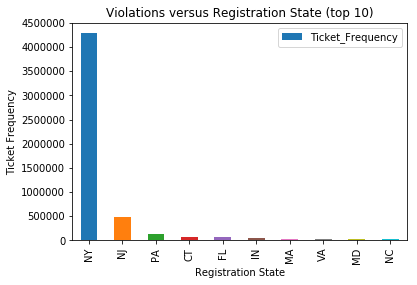

In [40]:
# plot violation versus Registration State
q2_for_plot = question2.toPandas()
plt.figure(figsize=(100,200))
q2_for_plot.head(10).plot(x='Registration_State', y='Ticket_Frequency', kind='bar')
plt.title("Violations versus Registration State (top 10)")
plt.xlabel('Registration State')
plt.ylabel('Ticket Frequency')

plt.show()

### Aggregation tasks

#### Q1. How often does each violation code occur? Display the frequency of the top five violation codes.

In [41]:
# Violation Code count
from pyspark.sql.functions import count,desc,countDistinct
nyc_parking.select(countDistinct("Violation_Code")).show()

+------------------------------+
|count(DISTINCT Violation_Code)|
+------------------------------+
|                           100|
+------------------------------+



In [42]:
# Frequency of each violation code occurs
Violation_Code_count = nyc_parking.select("Violation_Code")\
  .groupBy("Violation_Code")\
.agg(count("Violation_Code")\
.alias("no_of_tickets"))\
.sort(desc("no_of_tickets"))

Violation_Code_count.show(100)

+--------------+-------------+
|Violation_Code|no_of_tickets|
+--------------+-------------+
|            21|       767740|
|            36|       662765|
|            38|       541526|
|            14|       476405|
|            20|       319439|
|            46|       312168|
|            37|       293038|
|            40|       276905|
|            71|       263124|
|             7|       210176|
|            19|       148978|
|            70|       144242|
|            69|        96881|
|            31|        80528|
|            16|        74768|
|            47|        65427|
|            74|        57388|
|            50|        53710|
|             5|        48081|
|            48|        40970|
|            84|        40932|
|            24|        38435|
|            17|        38430|
|            51|        32553|
|            42|        32000|
|             9|        28670|
|            78|        26752|
|            10|        25917|
|            68|        25029|
|       

In [43]:
# Top 5 Violation code
question3 = spark.sql("SELECT Violation_Code, Count(*) as Ticket_Frequency from table_view_2017 group by Violation_code order by Ticket_Frequency desc")
question3.show(5)

+--------------+----------------+
|Violation_Code|Ticket_Frequency|
+--------------+----------------+
|            21|          767740|
|            36|          662765|
|            38|          541526|
|            14|          476405|
|            20|          319439|
+--------------+----------------+
only showing top 5 rows



<Figure size 432x288 with 0 Axes>

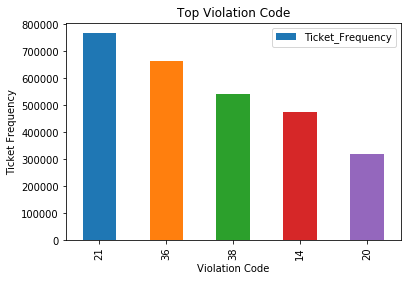

In [44]:
# Top 5 Violation code
q3_for_plot = question3.toPandas()
plt.clf()
q3_for_plot.head(5).plot(x='Violation_Code', y='Ticket_Frequency', kind='bar')
plt.title("Top Violation Code")
plt.xlabel('Violation Code')
plt.ylabel('Ticket Frequency')
plt.show()

#### Q2. How often does each 'vehicle body type' get a parking ticket? How about the 'vehicle make'?

In [45]:
# Each vehicle body type get a parking ticket
vehicleBodyType = spark.sql("SELECT Vehicle_Body_Type, count(*) as Ticket_Frequency from table_view_2017 group by Vehicle_Body_Type order by Ticket_Frequency desc")
vehicleBodyType.show(5)

+-----------------+----------------+
|Vehicle_Body_Type|Ticket_Frequency|
+-----------------+----------------+
|             SUBN|         1882978|
|             4DSD|         1547063|
|              VAN|          723796|
|             DELV|          358924|
|              SDN|          192927|
+-----------------+----------------+
only showing top 5 rows



<Figure size 432x288 with 0 Axes>

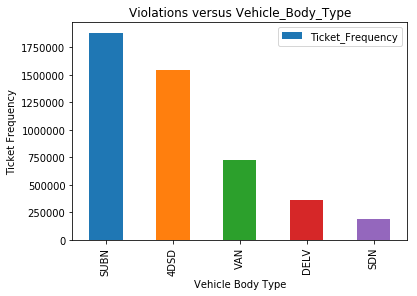

In [46]:
# plot Violations versus Vehicle_Body_Type
vehicleBodyType_for_plot = vehicleBodyType.toPandas()
plt.clf()
vehicleBodyType_for_plot.head(5).plot(x='Vehicle_Body_Type', y='Ticket_Frequency', kind='bar')
plt.title("Violations versus Vehicle_Body_Type")
plt.xlabel('Vehicle Body Type')
plt.ylabel('Ticket Frequency')
plt.show()

#### How about the 'vehicle make'?

In [47]:
vehicleMake = spark.sql("SELECT Vehicle_Make, count(*) as Ticket_Frequency from table_view_2017 group by Vehicle_Make order by Ticket_Frequency desc")
vehicleMake.show(5)

+------------+----------------+
|Vehicle_Make|Ticket_Frequency|
+------------+----------------+
|        FORD|          636527|
|       TOYOT|          605011|
|       HONDA|          538460|
|       NISSA|          461725|
|       CHEVR|          355868|
+------------+----------------+
only showing top 5 rows



<Figure size 432x288 with 0 Axes>

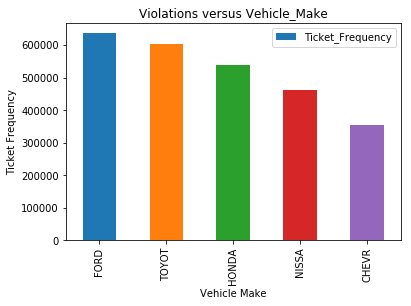

In [48]:
# plot Violations versus Vehicle_Make
vehicleMake_for_plot = vehicleMake.toPandas()
plt.clf()
vehicleMake_for_plot.head(5).plot(x='Vehicle_Make', y='Ticket_Frequency', kind='bar')
plt.title("Violations versus Vehicle_Make")
plt.xlabel('Vehicle Make')
plt.ylabel('Ticket Frequency')
plt.show()

##### Top 5 Violations based on Vehicle Body type - SUBN, 4DSD, VAN, DELV and SDN
##### Top 5 Violations based on Vehicle Make - FORD, TOYOT, HONDA, NISSA and CHEVR

#### Q3 : A precinct is a police station that has a certain zone of the city under its command.Find the (5 highest) frequency of tickets for each of the following:

#### 1.'Violation Precinct' (this is the precinct of the zone where the violation occurred). Using this, can you make any insights for parking violations in any specific areas of the city?

In [49]:
Violation_Precinct = spark.sql("SELECT Violation_Precinct, count(*) as Ticket_Frequency from table_view_2017 group by Violation_Precinct order by Ticket_Frequency desc")
Violation_Precinct.show(6)

+------------------+----------------+
|Violation_Precinct|Ticket_Frequency|
+------------------+----------------+
|                 0|          925395|
|                19|          274264|
|                14|          203375|
|                 1|          174620|
|                18|          169043|
|               114|          147223|
+------------------+----------------+
only showing top 6 rows



#### Here, you would have noticed that the dataframe has the'Violating Precinct' or 'Issuing Precinct' as '0'. These are erroneous entries. Hence, you need to provide the records for five correct precincts. (Hint: Print the top six entries after sorting.)

<Figure size 432x288 with 0 Axes>

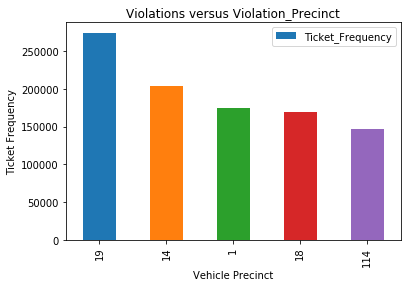

In [50]:
# plot Violations versus Violation_Precinct
Violation_Precinct_for_plot = Violation_Precinct.toPandas()
plt.clf()
Violation_Precinct_for_plot[Violation_Precinct_for_plot.Violation_Precinct!=0].head(5).plot(x='Violation_Precinct', y='Ticket_Frequency', kind='bar')
plt.title("Violations versus Violation_Precinct")
plt.xlabel('Vehicle Precinct')
plt.ylabel('Ticket Frequency')
plt.show()

#### 2 'Issuer Precinct' (this is the precinct that issued the ticket)

In [51]:
Issue_precinct = spark.sql("SELECT Issuer_Precinct, count(*) as Ticket_Frequency from table_view_2017 group by Issuer_Precinct order by Ticket_Frequency desc")  
Issue_precinct.show(5)

+---------------+----------------+
|Issuer_Precinct|Ticket_Frequency|
+---------------+----------------+
|              0|         1077884|
|             19|          266790|
|             14|          200328|
|              1|          168630|
|             18|          162908|
+---------------+----------------+
only showing top 5 rows



#### Here, you would have noticed that the dataframe has the'Violating Precinct' or 'Issuing Precinct' as '0'. These are erroneous entries. Hence, you need to provide the records for five correct precincts. (Hint: Print the top six entries after sorting.)

<Figure size 432x288 with 0 Axes>

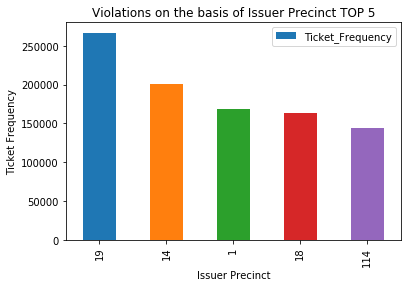

In [52]:
# plot Violations on the basis of Issue_Precinct
Issue_Precinct_for_plot = Issue_precinct.toPandas()
plt.clf()
Issue_Precinct_for_plot[Issue_Precinct_for_plot.Issuer_Precinct!=0].head(5).plot(x='Issuer_Precinct', y='Ticket_Frequency', kind='bar')
plt.title("Violations on the basis of Issuer Precinct TOP 5")
plt.xlabel('Issuer Precinct')
plt.ylabel('Ticket Frequency')
plt.show()

* So the top 5 area where most violation occurs are 19, 14, 1, 18 and 114.
* Similarily, the top 5 Issuer Precient are 19, 14, 1, 18 and 114

#### Q4. Find the violation code frequency across three precincts which have issued the most number of tickets.Do these precinct zones have an exceptionally high frequency of certain violation codes? Are these codes common across precincts? Hint: In the SQL view, use the 'where' attribute to filter among three precincts

#### 4.1 Finding violation code frequency

In [53]:
violation_code_freq = spark.sql("select Issuer_Precinct,Violation_Code, count(*) as Frequency from table_view_2017 group by Issuer_Precinct, Violation_Code order by Frequency desc" )
violation_code_freq.show(7)

+---------------+--------------+---------+
|Issuer_Precinct|Violation_Code|Frequency|
+---------------+--------------+---------+
|              0|            36|   662765|
|              0|             7|   210175|
|              0|            21|   125923|
|             18|            14|    50135|
|             19|            46|    48422|
|              0|             5|    48076|
|             14|            14|    45019|
+---------------+--------------+---------+
only showing top 7 rows



#### Not considering 0. Therefore 18,19,14 are the three issuer precincts with maximum number of violations.

In [54]:
# Issuer Precinct 18 here
violation_code_freq_18 = spark.sql("select Violation_Code, count(*) as Frequency from table_view_2017 where Issuer_Precinct=18 group by Violation_Code order by Frequency desc" )
violation_code_freq_18.show(10)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            14|    50135|
|            69|    20188|
|            47|    14105|
|            31|    11887|
|            46|     7861|
|            42|     6189|
|            38|     6157|
|            84|     5188|
|            19|     4580|
|            20|     4109|
+--------------+---------+
only showing top 10 rows



In [55]:
# Issuer Precinct 19 here
violation_code_freq_19 = spark.sql("select Violation_Code, count(*) as Frequency from table_view_2017 where Issuer_Precinct=19 group by Violation_Code order by Frequency desc" )
violation_code_freq_19.show(10)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            46|    48422|
|            38|    36332|
|            37|    36046|
|            14|    29791|
|            21|    28409|
|            20|    14624|
|            40|    11408|
|            16|     9921|
|            71|     7489|
|            19|     6854|
+--------------+---------+
only showing top 10 rows



In [56]:
# Issuer Precinct 14 here
violation_code_freq_14 = spark.sql("select Violation_Code, count(*) as Frequency from table_view_2017 where Issuer_Precinct=14 group by Violation_Code order by Frequency desc" )
violation_code_freq_14.show(10)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            14|    45019|
|            69|    30453|
|            31|    22528|
|            47|    18357|
|            42|    10022|
|            46|     7675|
|            19|     7031|
|            84|     6739|
|            82|     5052|
|            40|     3581|
+--------------+---------+
only showing top 10 rows



#### 4.2 Common codes across precincts

In [57]:
common =spark.sql("select Violation_Code, count(*) as Frequency from table_view_2017 where Issuer_Precinct in (18,19,14) group by Violation_Code order by Frequency desc")
common.show(5)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            14|   124945|
|            46|    63958|
|            69|    53549|
|            38|    45721|
|            37|    39537|
+--------------+---------+
only showing top 5 rows



#### Inference:

* Precinct 18 and Precinct 14 has almost similar top violation code.

* Precinct 19 has very different top violation code.

#### Q5.Find out the properties of parking violations across different times of the day:
* Find a way to deal with missing values, if any. (Hint: Check for the null values using 'isNull' under the SQL. Also, to remove the null values, check the 'dropna' command in the API documentation.)

* The Violation Time field is specified in a strange format. Find a way to make this a time attribute that you can use to divide into groups.

* Divide 24 hours into six equal discrete bins of time. Choose the intervals as you see fit. For each of these groups, find the three most commonly occurring violations. (Hint: Use the CASE-WHEN in SQL view to segregate into bins. To find the most commonly occurring violations, you can use an approach similar to the one mentioned in the hint for question 4.)

* Now, try another direction. For the three most commonly occurring violation codes, find the most common time of the day (in terms of the bins from the previous part).

In [58]:
# Number of missing values
null_val = spark.sql("SELECT count(*) as No_of_Count_Values from table_view_2017 WHERE Violation_Time is NULL")
null_val.show()

+------------------+
|No_of_Count_Values|
+------------------+
|                 0|
+------------------+



In [59]:
# Null check
from pyspark.sql.functions import col
nyc_parking.where(col("Violation_Time").isNull()).show()

+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons_Number|Plate_ID|Registration_State|Issue_Date|Violation_Code|Vehicle_Body_Type|Vehicle_Make|Violation_Precinct|Issuer_Precinct|Violation_Time|
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+



In [60]:
nyc_parking.select('Violation_Time').show()

+--------------+
|Violation_Time|
+--------------+
|         0148P|
|         1044A|
|         0515P|
|         1007A|
|         0202A|
|         0743A|
|         0825A|
|         0938A|
|         1202P|
|         0159P|
|         0236A|
|         1258P|
|         1041A|
|         0748A|
|         0639A|
|         1005A|
|         0959A|
|         0244P|
|         0611A|
|         1044A|
+--------------+
only showing top 20 rows



In [61]:
# Divide 24 hours into six equal discrete bins of time.
bins=spark.sql("SELECT Summons_Number, Violation_Code , Violation_Time, Issuer_Precinct, case when substring(Violation_Time,1,2) in ('00','01','02','03','12') and upper(substring(Violation_Time,-1))='A' then 1 when substring(Violation_Time,1,2) in ('04','05','06','07') and upper(substring(Violation_Time,-1))='A' then 2 when substring(Violation_Time,1,2) in ('08','09','10','11') and upper(substring(Violation_Time,-1))='A' then 3 when substring(Violation_Time,1,2) in ('12','00','01','02','03') and upper(substring(Violation_Time,-1))='P' then 4 when substring(Violation_Time,1,2) in ('04','05','06','07') and upper(substring(Violation_Time,-1))='P' then 5 when substring(Violation_Time,1,2) in ('08','09','10','11') and upper(substring(Violation_Time,-1))='P' then 6 else null end as Violation_Time_bin from table_view_2017 where Violation_Time is not null or (length(Violation_Time)=5 and upper(substring(Violation_Time,-1)) in ('A','P') and substring(Violation_Time,1,2) in ('00','01','02','03','04','05','06','07', '08','09','10','11','12'))")
bins.show()

+--------------+--------------+--------------+---------------+------------------+
|Summons_Number|Violation_Code|Violation_Time|Issuer_Precinct|Violation_Time_bin|
+--------------+--------------+--------------+---------------+------------------+
|    4635192880|            36|         1017A|              0|                 3|
|    4635220096|            36|         0251P|              0|                 4|
|    8547250270|            48|         0950A|             78|                 3|
|    8546800741|            71|         0157P|             72|                 4|
|    8489121436|            14|         0109P|            112|                 4|
|    8546858731|            71|         0300P|             67|                 4|
|    8505451533|            42|         0107P|              1|                 4|
|    8404039161|            14|         0123P|             63|                 4|
|    4631723956|            36|         1152A|              0|                 3|
|    8548679025|

In [62]:
bins.createOrReplaceTempView("bins_tbl")

In [64]:
bin_1 = spark.sql("select Violation_Code,count(*) Vio_cnt from bins_tbl where Violation_Time_bin == 1 group by Violation_Code order by Vio_cnt desc")
bin_1.show(3)

+--------------+-------+
|Violation_Code|Vio_cnt|
+--------------+-------+
|            21|  36934|
|            40|  25810|
|            78|  15513|
+--------------+-------+
only showing top 3 rows



In [65]:
bin_2 = spark.sql("select Violation_Code,count(*) Vio_cnt from bins_tbl where Violation_Time_bin == 2 group by Violation_Code order by Vio_cnt desc")
bin_2.show(3)

+--------------+-------+
|Violation_Code|Vio_cnt|
+--------------+-------+
|            14|  74095|
|            40|  60609|
|            21|  57876|
+--------------+-------+
only showing top 3 rows



In [66]:
bin_3 = spark.sql("select Violation_Code,count(*) Vio_cnt from bins_tbl where Violation_Time_bin == 3 group by Violation_Code order by Vio_cnt desc")
bin_3.show(3)

+--------------+-------+
|Violation_Code|Vio_cnt|
+--------------+-------+
|            21| 597827|
|            36| 348165|
|            38| 176310|
+--------------+-------+
only showing top 3 rows



In [67]:
bin_4 = spark.sql("select Violation_Code,count(*) Vio_cnt from bins_tbl where Violation_Time_bin == 4 group by Violation_Code order by Vio_cnt desc")
bin_4.show(3)

+--------------+-------+
|Violation_Code|Vio_cnt|
+--------------+-------+
|            36| 286284|
|            38| 240511|
|            37| 166969|
+--------------+-------+
only showing top 3 rows



In [68]:
bin_5 = spark.sql("select Violation_Code,count(*) Vio_cnt from bins_tbl where Violation_Time_bin == 5 group by Violation_Code order by Vio_cnt desc")
bin_5.show(3)

+--------------+-------+
|Violation_Code|Vio_cnt|
+--------------+-------+
|            38| 102784|
|            14|  75856|
|            37|  70317|
+--------------+-------+
only showing top 3 rows



In [69]:
bin_6 = spark.sql("select Violation_Code,count(*) Vio_cnt from bins_tbl where Violation_Time_bin == 6 group by Violation_Code order by Vio_cnt desc")
bin_6.show(3)

+--------------+-------+
|Violation_Code|Vio_cnt|
+--------------+-------+
|             7|  26293|
|            40|  22301|
|            14|  21026|
+--------------+-------+
only showing top 3 rows



#### Now, try another direction. For the three most commonly occurring violation codes, find the most common time of the day (in terms of the bins from the previous part).

In [70]:
common_time_bin = spark.sql("select Violation_Time_bin, count(*) Vio_count from bins_tbl where Violation_Code in (21, 36, 38) group by Violation_Time_bin order by Vio_count desc")
common_time_bin.show(3)

+------------------+---------+
|Violation_Time_bin|Vio_count|
+------------------+---------+
|                 3|  1122302|
|                 4|   601432|
|                 5|   116574|
+------------------+---------+
only showing top 3 rows



#### Bins 3, 4, 5 are having most violations

Main reason could be, In day time there would be more vehicles running and hence more violations.

#### Q6.Let’s try and find some seasonality in this data:
#### a)First, divide the year into some number of seasons,and find frequencies of tickets for each season

In [71]:
tickets_per_season = spark.sql("select Violation_Code , Issuer_Precinct, case when MONTH(TO_DATE(Issue_Date, 'MM/dd/yyyy')) between 03 and 05 then 'spring' when MONTH(TO_DATE(Issue_Date, 'MM/dd/yyyy')) between 06 and 08 then 'summer' when MONTH(TO_DATE(Issue_Date, 'MM/dd/yyyy')) between 09 and 11 then 'autumn' when MONTH(TO_DATE(Issue_Date, 'MM/dd/yyyy')) in (1,2,12) then 'winter' else 'unknown' end  as season from table_view_2017")
tickets_per_season.show()

+--------------+---------------+------+
|Violation_Code|Issuer_Precinct|season|
+--------------+---------------+------+
|            36|              0|summer|
|            38|             19|winter|
|            14|            108|summer|
|            21|             67|winter|
|            20|            110|spring|
|            70|            112|winter|
|            46|             24|spring|
|             7|              0|spring|
|            38|            110|spring|
|             5|              0|winter|
|            14|             88|winter|
|            19|             66|spring|
|            74|            101|spring|
|            20|             20|spring|
|            36|              0|spring|
|            50|             49|winter|
|            36|              0|summer|
|            38|            102|winter|
|            21|              0|summer|
|            38|            106|winter|
+--------------+---------------+------+
only showing top 20 rows



##### Season Binning Details

* Season --->   Month interval

* spring --->    March, April, May
* summer --->    June, July, August
* autumn --->   September, October, November
* winter --->   December, January, February

In [72]:
tickets_per_season.createOrReplaceTempView("tickets_per_season_tbl")

In [73]:
tickets_per_season_freq = spark.sql("select season, count(*) as no_of_tickets from tickets_per_season_tbl group by 1 order by 2 desc")
tickets_per_season_freq.show()

+------+-------------+
|season|no_of_tickets|
+------+-------------+
|spring|      2870491|
|winter|      1702786|
|summer|       852405|
|autumn|          975|
+------+-------------+



In [74]:
# Spring season
violation_in_spring = spark.sql("select Violation_Code, count(*) as Frequency from tickets_per_season_tbl where Issuer_Precinct in (19, 14, 1) and season = 'spring' group by Violation_Code order by Frequency desc" )
violation_in_spring.show(3)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            14|    61633|
|            46|    37732|
|            38|    25511|
+--------------+---------+
only showing top 3 rows



In [75]:
# Winter season
violation_in_winter = spark.sql("select Violation_Code, count(*) as Frequency from tickets_per_season_tbl where Issuer_Precinct in (19, 14, 1) and season = 'winter' group by Violation_Code order by Frequency desc" )
violation_in_winter.show(3)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            14|    32824|
|            46|    20148|
|            38|    14885|
+--------------+---------+
only showing top 3 rows



In [76]:
# Summer season
violation_in_summer = spark.sql("select Violation_Code, count(*) as Frequency from tickets_per_season_tbl where Issuer_Precinct in (19, 14, 1) and season = 'summer' group by Violation_Code order by Frequency desc" )
violation_in_summer.show(3)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            14|    18689|
|            46|    10945|
|            20|    10393|
+--------------+---------+
only showing top 3 rows



In [77]:
# Autumn season
violation_in_autumn = spark.sql("select Violation_Code, count(*) as Frequency from tickets_per_season_tbl where Issuer_Precinct in (19, 14, 1) and season = 'autumn' group by Violation_Code order by Frequency desc" )
violation_in_autumn.show(3)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            46|       15|
|            14|        9|
|            78|        3|
+--------------+---------+
only showing top 3 rows



#### Q7. The fines collected from all the instances of parking violation constitute a source of revenue for the NYC Police Department. Let’s take an example of estimating this for the three most commonly occurring codes:

#### a). Find total occurrences of the three most common violation codes

In [78]:
common_Violation = spark.sql("select Violation_Code, count(*) as Frequency from table_view_2017 group by Violation_Code order by Frequency desc")
common_Violation.show(3)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            21|   767740|
|            36|   662765|
|            38|   541526|
+--------------+---------+
only showing top 3 rows



#### b). Using this information, find the total amount collected for the three violation codes with maximum tickets. State the code which has the highest total collection

In [79]:
from pyspark.sql.functions import when

common_Violation_fine=common_Violation.withColumn("fine",when(common_Violation.Violation_Code == 21, (common_Violation.Frequency) *55).otherwise((common_Violation.Frequency)*50))
common_Violation_fine.show(3)
print('Total collection = ',767740*55+662765*50+541526*50)

+--------------+---------+--------+
|Violation_Code|Frequency|    fine|
+--------------+---------+--------+
|            21|   767740|42225700|
|            36|   662765|33138250|
|            38|   541526|27076300|
+--------------+---------+--------+
only showing top 3 rows

Total collection =  102440250


#### Code with 21 had the highest collection.

#### c).What can you intuitively infer from these findings?
* Jan to June had the major violation and July to Dec has very less violation.
* Code-21 has the highest violation and collection (No parking where parking is not allowed by sign, street marking or traffic control device.)

In [80]:
spark.stop()

#### End of Case Study